In [11]:
# 🚀 Линейная регрессия с Momentum и L2-регуляризацией
### Улучшенная версия с фиксами NaN, градиентным клиппингом и проверкой начальных условий


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 📌 Создаем данные: рост, возраст → вес
X = np.array([
    [1.7, 25], [1.8, 30], [1.6, 20], [1.75, 35],
    [1.65, 40], [1.85, 45], [1.55, 18], [1.70, 29],
    [1.78, 33], [1.62, 21]
])
y = np.array([70, 80, 55, 78, 65, 90, 50, 74, 82, 58])

In [32]:
# 📌 Создаем данные: рост, возраст → вес
X = np.array([
    [1.7, 25], [1.8, 30], [1.6, 20], [1.75, 35],
    [1.65, 40], [1.85, 45], [1.55, 18], [1.70, 29],
    [1.78, 33], [1.62, 21]
])
y = np.array([70, 80, 55, 78, 65, 90, 50, 74, 82, 58])

In [33]:
# 📌 Разделяем на train (80%) и validation (20%)
N = len(X)
split_idx = int(N * 0.8)
X_train, X_val = X[:split_idx], X[split_idx:]
y_train, y_val = y[:split_idx], y[split_idx:]

In [34]:
# 📌 Нормализация данных (Standardization)
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
X_train = (X_train - mean_X) / std_X
X_val = (X_val - mean_X) / std_X

mean_y = np.mean(y_train)
std_y = np.std(y_train)
y_train = (y_train - mean_y) / std_y
y_val = (y_val - mean_y) / std_y

In [26]:
# 📌 Параметры обучения
learning_rate = 0.00005 # Уменьшаем шаг обучения
epochs = 5000  # Количество эпох
momentum = 0.8  # Коэффициент Momentum
lambda_reg = 0.01  # Коэффициент L2-регуляризации (чем больше, тем сильнее штраф за большие веса)
clip_value = 1.0  # Ограничение градиентов

# Лог для отслеживания процесса
losses = []
w1_history, w2_history, b_history = [], [], []

In [36]:
# 📌 Инициализируем случайные веса
w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()

In [37]:
# 🚨 Проверяем, что веса не NaN, иначе переопределяем
if np.isnan(w1) or np.isnan(w2) or np.isnan(b):
    print("Обнаружены NaN в весах! Переинициализируем...")
    w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()


In [38]:
# 📌 Создаем "скорости" для Momentum (изначально = 0)
v_w1, v_w2, v_b = 0, 0, 0

In [39]:
# Выводим начальные веса
print(f"Начальные веса: w1={w1:.3f}, w2={w2:.3f}, b={b:.3f}")

Начальные веса: w1=-0.780, w2=0.291, b=0.306


In [40]:
# 📌 Параметры обучения
learning_rate = 0.00005  # Уменьшаем шаг обучения
epochs = 5000  # Количество эпох
momentum = 0.8  # Коэффициент Momentum
lambda_reg = 0.01  # Коэффициент L2-регуляризации (чем больше, тем сильнее штраф за большие веса)
clip_value = 1.0  # Ограничение градиентов

# Лог для отслеживания процесса
losses = []
w1_history, w2_history, b_history = [], [], []


In [41]:
# 📌 Функция потерь (MSE) с L2-регуляризацией
def mse(y_true, y_pred):
    loss = np.mean((y_true - y_pred) ** 2)
    reg = lambda_reg * (w1**2 + w2**2)  # Убрали лишние np.nan_to_num()
    return loss + reg

In [42]:
# 📌 Запуск обучения
for epoch in range(epochs):
    # Предсказание
    y_pred = w1 * X_train[:, 0] + w2 * X_train[:, 1] + b
    
    # Вычисляем ошибку
    loss = mse(y_train, y_pred)
    losses.append(loss)

    # Сохранение истории весов
    w1_history.append(w1)
    w2_history.append(w2)
    b_history.append(b)

    # 📌 Вычисление градиентов с учетом L2-регуляризации
    dw1 = -2 * np.mean((y_train - y_pred) * X_train[:, 0]) + 2 * lambda_reg * w1
    dw2 = -2 * np.mean((y_train - y_pred) * X_train[:, 1]) + 2 * lambda_reg * w2
    db = -2 * np.mean(y_train - y_pred)

    # 📌 Градиентный клиппинг
    dw1 = np.clip(dw1, -clip_value, clip_value)
    dw2 = np.clip(dw2, -clip_value, clip_value)
    db = np.clip(db, -clip_value, clip_value)

    # 📌 Momentum: обновление "скорости" градиентов
    v_w1 = momentum * v_w1 + learning_rate * dw1
    v_w2 = momentum * v_w2 + learning_rate * dw2
    v_b = momentum * v_b + learning_rate * db

    # 📌 Обновляем веса
    w1 -= v_w1
    w2 -= v_w2
    b -= v_b

    # 📌 Вывод ошибки каждые 100 эпох
    if epoch % 100 == 0:
        print(f"Эпоха {epoch}, Ошибка: {loss:.3f}, w1={w1:.5f}, w2={w2:.5f}, b={b:.5f}")



Эпоха 0, Ошибка: 2.552, w1=-0.78037, w2=0.29117, b=0.30570
Эпоха 100, Ошибка: 2.420, w1=-0.75617, w2=0.31537, b=0.29123
Эпоха 200, Ошибка: 2.288, w1=-0.73117, w2=0.34037, b=0.27699
Эпоха 300, Ошибка: 2.160, w1=-0.70617, w2=0.36537, b=0.26345
Эпоха 400, Ошибка: 2.038, w1=-0.68117, w2=0.39037, b=0.25058
Эпоха 500, Ошибка: 1.921, w1=-0.65617, w2=0.41537, b=0.23833
Эпоха 600, Ошибка: 1.809, w1=-0.63117, w2=0.44037, b=0.22668
Эпоха 700, Ошибка: 1.701, w1=-0.60617, w2=0.46537, b=0.21560
Эпоха 800, Ошибка: 1.599, w1=-0.58117, w2=0.49037, b=0.20506
Эпоха 900, Ошибка: 1.501, w1=-0.55617, w2=0.51537, b=0.19504
Эпоха 1000, Ошибка: 1.408, w1=-0.53117, w2=0.54037, b=0.18551
Эпоха 1100, Ошибка: 1.320, w1=-0.50617, w2=0.56537, b=0.17644
Эпоха 1200, Ошибка: 1.236, w1=-0.48117, w2=0.59037, b=0.16781
Эпоха 1300, Ошибка: 1.157, w1=-0.45617, w2=0.61527, b=0.15961
Эпоха 1400, Ошибка: 1.084, w1=-0.43117, w2=0.63857, b=0.15181
Эпоха 1500, Ошибка: 1.017, w1=-0.40617, w2=0.65982, b=0.14439
Эпоха 1600, Ошибка: 

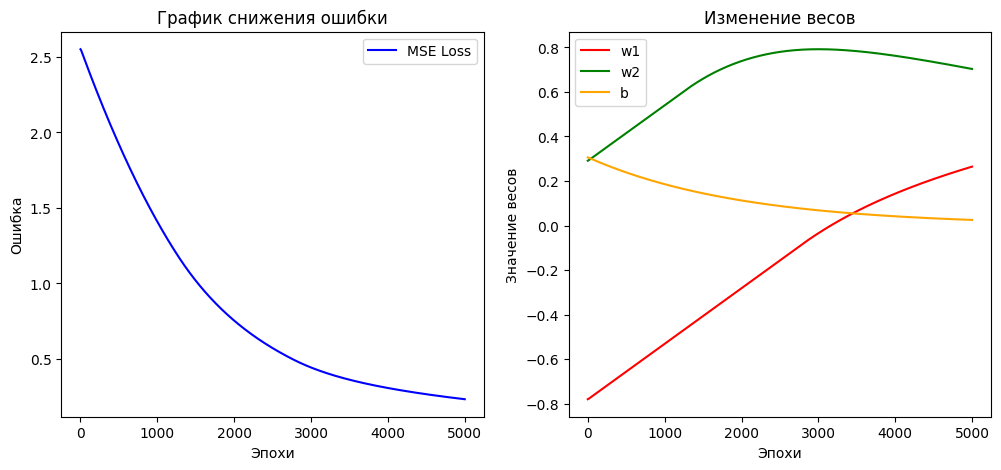

In [43]:
# 📌 Визуализация результатов
plt.figure(figsize=(12, 5))

# График снижения ошибки (Loss Curve)
plt.subplot(1, 2, 1)
plt.plot(losses, label='MSE Loss', color='blue')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График снижения ошибки')
plt.legend()

# График изменения весов
plt.subplot(1, 2, 2)
plt.plot(w1_history, label='w1', color='red')
plt.plot(w2_history, label='w2', color='green')
plt.plot(b_history, label='b', color='orange')
plt.xlabel('Эпохи')
plt.ylabel('Значение весов')
plt.title('Изменение весов')
plt.legend()

plt.show()

In [44]:
# 📌 Оценка модели на тестовых данных
y_val_pred = w1 * X_val[:, 0] + w2 * X_val[:, 1] + b
val_loss = mse(y_val, y_val_pred)
print(f"📊 Ошибка на валидационных данных (MSE): {val_loss:.3f}")

📊 Ошибка на валидационных данных (MSE): 0.120


In [45]:
# 📌 Тестируем модель на новых данных
рост = 1.72
возраст = 28
X_new = np.array([[рост, возраст]])
X_new = (X_new - mean_X) / std_X  # **Нормализация новых данных**

предсказанный_вес_norm = w1 * X_new[0, 0] + w2 * X_new[0, 1] + b
предсказанный_вес = (предсказанный_вес_norm * std_y) + mean_y  # **Обратная нормализация**

print(f"🔮 Предсказанный вес для роста {рост}м и возраста {возраст} лет: {предсказанный_вес:.2f} кг")


🔮 Предсказанный вес для роста 1.72м и возраста 28 лет: 69.03 кг
